# haarcasecade_open cv

In [1]:
import cv2

casepath = ('./models/haarcascade_frontalface_default.xml')
facecascade = cv2.CascadeClassifier(casepath)

def detect_face_haar_cv(frame_bgr):
    # Convert to grayscale
    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = facecascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    
    # Draw rectangles and put text on detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame_bgr, 'Face', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the number of faces detected
    cv2.putText(frame_bgr, 'Number of Faces: ' + str(len(faces)), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    return frame_bgr


# img

In [1]:
# 단일 그림 출력
import matplotlib.pyplot as plt
frame_bgr = cv2.imread("lenna.jpg")
frame_bgr = detect_largest_face_dnn_cv(frame_bgr)

frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off') 
plt.show()

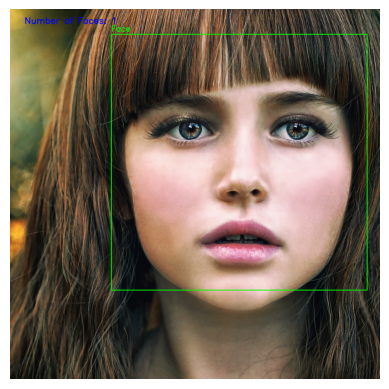

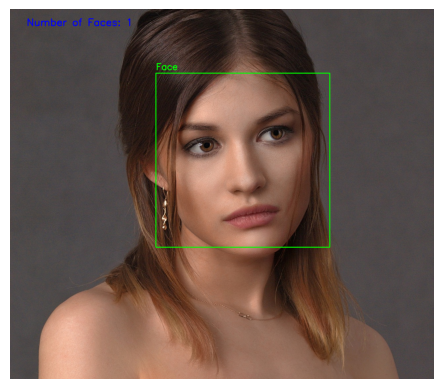

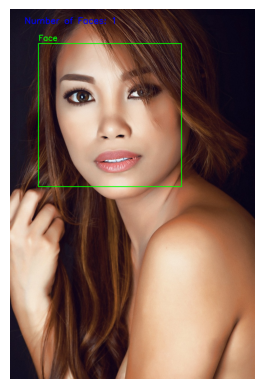

In [3]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

file_dir = Path('./faces/')

imgs = file_dir.glob('*.jpg')
for i, img in enumerate(imgs):
    frame_bgr = cv2.imread(str(img))
    
    # Check if image was successfully read
    if frame_bgr is None:
        print(f"Error reading image {img}")
        continue
    
    # Detect faces in the image
    frame_bgr = detect_face_haar_cv(frame_bgr)
    
    # Convert the image from BGR to RGB for displaying with Matplotlib
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(frame_rgb)
    plt.axis('off') 
    plt.show()

# capture video

In [68]:
import cv2
import time
video_capture = cv2.VideoCapture(0)
s_time = time.time()
cnt = 0

while True:
    cnt += 1
    ret, frame_bgr = video_capture.read()
    frame_bgr = detect_face_haar_cv(frame_bgr)
    
    cv2.imshow('Video', frame_bgr)
    if cv2.waitKey(1)==27:  # 27 == Esc
        break
    
    if time.time() - s_time > 0.1:
        print(f"\rFPS = {cnt / (time.time() - s_time):.1f}" + ' ' * 20, end = '')
        s_time = time.time()
        cnt = 0

video_capture.release()
cv2.destroyAllWindows()


FPS = 31.6                    

# DNN Face Detector in openCV

In [4]:
import cv2
import numpy as np

modelFile = "./models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "./models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

scale = 1.0
out_size = (300, 300)
avg_to_remove = (104.0, 177.0, 123.0)

def detect_face_dnn_cv(frame_bgr):
    (h, w) = frame_bgr.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame_bgr, out_size), scale, out_size, avg_to_remove)
    net.setInput(blob)
    detections = net.forward()

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            text = f"{confidence * 100:.2f}%"

            # Draw the bounding box and label on the image
            cv2.rectangle(frame_bgr, (startX, startY), (endX, endY), (0, 255, 0), 2)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.putText(frame_bgr, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    return frame_bgr


# 여러사람중에 가장 큰 사람 한명만 검출

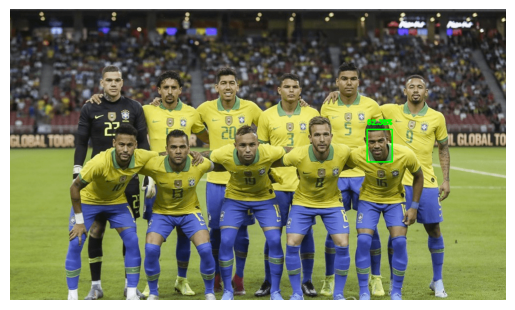

In [2]:
#B
import cv2
import numpy as np
import matplotlib.pyplot as plt

modelFile = "./models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "./models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

scale = 1.0
out_size = (300, 300)
avg_to_remove = (104.0, 177.0, 123.0)

def detect_largest_face_dnn_cv(frame_bgr):
    (h, w) = frame_bgr.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame_bgr, out_size), scale, out_size, avg_to_remove)
    net.setInput(blob)
    detections = net.forward()

    largest_face = None 
    largest_area = 0     

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            area = (endX - startX) * (endY - startY)  
            if area > largest_area:  
                largest_area = area
                largest_face = (startX, startY, endX, endY, confidence)

    if largest_face:  
        (startX, startY, endX, endY, confidence) = largest_face
        text = f"{confidence * 100:.2f}%"
        cv2.rectangle(frame_bgr, (startX, startY), (endX, endY), (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(frame_bgr, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    return frame_bgr

frame_bgr = cv2.imread("soccer.jpg")
frame_bgr = detect_largest_face_dnn_cv(frame_bgr)

frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off') 
plt.show()


# img

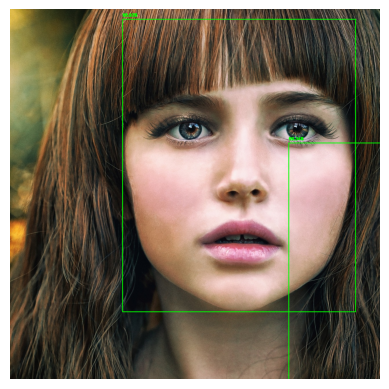

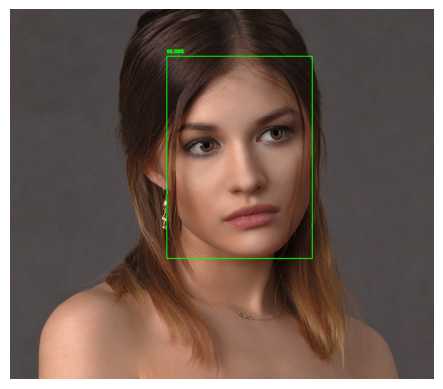

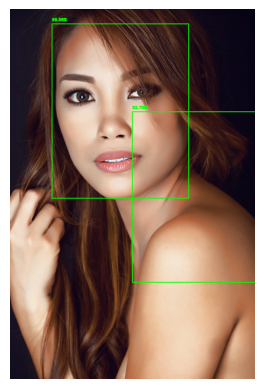

In [6]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

file_dir = Path('./faces/')

imgs = file_dir.glob('*.jpg')
for i, img in enumerate(imgs):
    frame_bgr = cv2.imread(str(img))
    
    # Check if image was successfully read
    if frame_bgr is None:
        print(f"Error reading image {img}")
        continue
    
    # Detect faces in the image
    frame_bgr = detect_face_dnn_cv(frame_bgr)
    
    # Convert the image from BGR to RGB for displaying with Matplotlib
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# capture video

In [71]:
video_capture = cv2.VideoCapture(0)
s_time = time.time()
cnt = 0

while True:
    cnt += 1
    ret, frame_bgr = video_capture.read()
    frame_bgr = detect_face_dnn_cv(frame_bgr)
    
    cv2.imshow('Video', frame_bgr)
    if cv2.waitKey(1)==27:  # 27 == Esc
        break
    
    if time.time() - s_time > 0.1:
        print(f"\rFPS = {cnt / (time.time() - s_time):.1f}" + ' ' * 20, end = '')
        s_time = time.time()
        cnt = 0

video_capture.release()
cv2.destroyAllWindows()

FPS = 21.0                    

# Dlib
1. Histogram of oriented gradients(HOG)

In [1]:
import dlib
# dlib.DLIB_USE_CUDA = True
print(dlib.DLIB_USE_CUDA, dlib.cuda.get_device())
# python setip.py install -- yes DlIb_USE_CUDA

False 0


In [7]:
import cv2
import dlib
from pathlib import Path
from imutils import face_utils
import matplotlib.pyplot as plt

face_detect = dlib.get_frontal_face_detector()
upsampling_factor = 1

def detcet_face_hog_dlib(frame_bgr):
    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    rects = face_detect(gray,upsampling_factor)
    for (i,rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame_bgr, (x, y), (x + w, y + h), (0, 255, 0), 3)
    return frame_bgr
    

# img

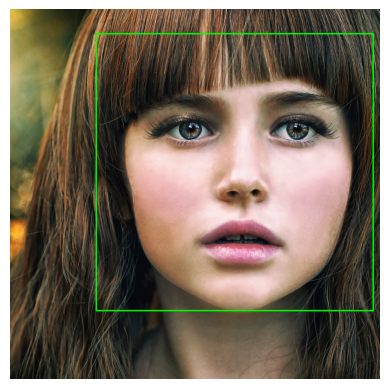

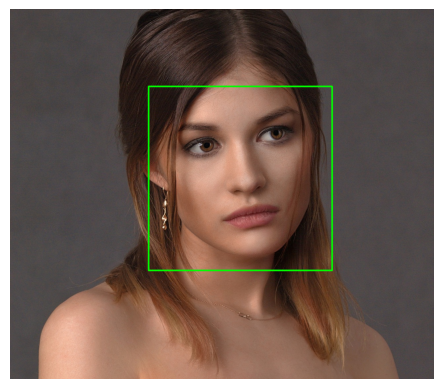

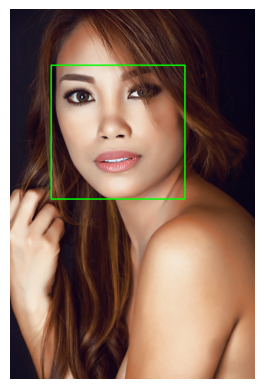

In [8]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

file_dir = Path('./faces/')

imgs = file_dir.glob('*.jpg')
for i, img in enumerate(imgs):
    frame_bgr = cv2.imread(str(img))
    
    # Check if image was successfully read
    if frame_bgr is None:
        print(f"Error reading image {img}")
        continue
    
    # Detect faces in the image
    frame_bgr = detcet_face_hog_dlib(frame_bgr)
    
    # Convert the image from BGR to RGB for displaying with Matplotlib
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# capture video

In [ ]:
import time
video_capture = cv2.VideoCapture(0)
s_time = time.time()
cnt = 0

while True:
    cnt += 1
    ret, frame_bgr = video_capture.read()
    frame_bgr = detcet_face_hog_dlib(frame_bgr)
    
    cv2.imshow('Video', frame_bgr)
    if cv2.waitKey(1)==27:  # 27 == Esc
        break
    
    if time.time() - s_time > 0.1:
        print(f"\rFPS = {cnt / (time.time() - s_time):.1f}" + ' ' * 20, end = '')
        s_time = time.time()
        cnt = 0

video_capture.release()
cv2.destroyAllWindows()

# CNN

In [9]:
dnnfacedetector = dlib.cnn_face_detection_model_v1("./models/mmod_human_face_detector.dat")


def detect_face_cnn_dlib(frame_bgr):
    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    rects = dnnfacedetector(gray, 1)
    for (i, rect) in enumerate(rects):
        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()
        cv2.rectangle(frame_bgr, (x1, y1), (x2, y2), (0,255,0), 2)
    return frame_bgr

# img

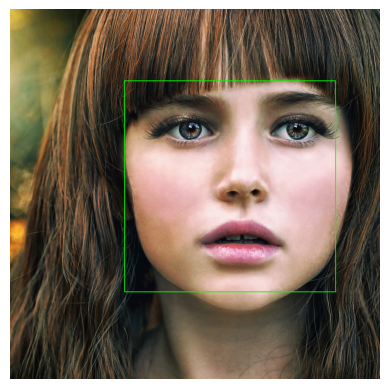

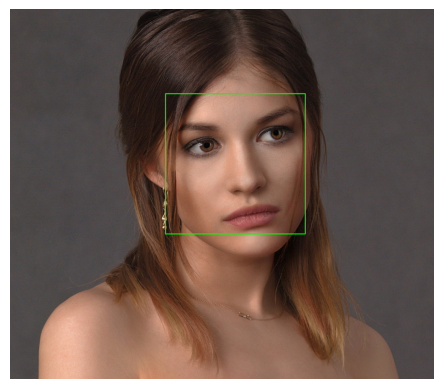

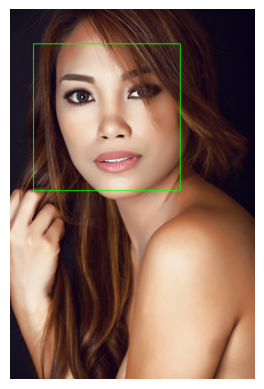

In [10]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

file_dir = Path('./faces/')

imgs = file_dir.glob('*.jpg')
for i, img in enumerate(imgs):
    frame_bgr = cv2.imread(str(img))
    
    # Check if image was successfully read
    if frame_bgr is None:
        print(f"Error reading image {img}")
        continue
    
    # Detect faces in the image
    frame_bgr = detect_face_cnn_dlib(frame_bgr)
    
    # Convert the image from BGR to RGB for displaying with Matplotlib
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# video capture

In [78]:
video_capture = cv2.VideoCapture(0)
s_time = time.time()
cnt = 0

while True:
    cnt += 1
    ret, frame_bgr = video_capture.read()
    frame_bgr = detect_face_cnn_dlib(frame_bgr)
    
    cv2.imshow('Video', frame_bgr)
    if cv2.waitKey(1)==27:  # 27 == Esc
        break
    
    if time.time() - s_time > 0.1:
        print(f"\rFPS = {cnt / (time.time() - s_time):.1f}" + ' ' * 20, end = '')
        s_time = time.time()
        cnt = 0

video_capture.release()
cv2.destroyAllWindows()

FPS = 3.5                    